<a href="https://colab.research.google.com/github/AmanSharmas/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Aman Sharma

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. rfm_model

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import chi2_contingency

### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset =pd.read_csv('/content/drive/MyDrive/Data/Online Retail.csv')

In [ ]:
# Creating a copy named df from dataset
df = dataset.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

In [ ]:
# Droping duplicate values from the dataset
df.drop_duplicates(inplace = True)

In [ ]:
# Checking rows and columns after droping duplicate values.
df.shape

(536641, 8)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

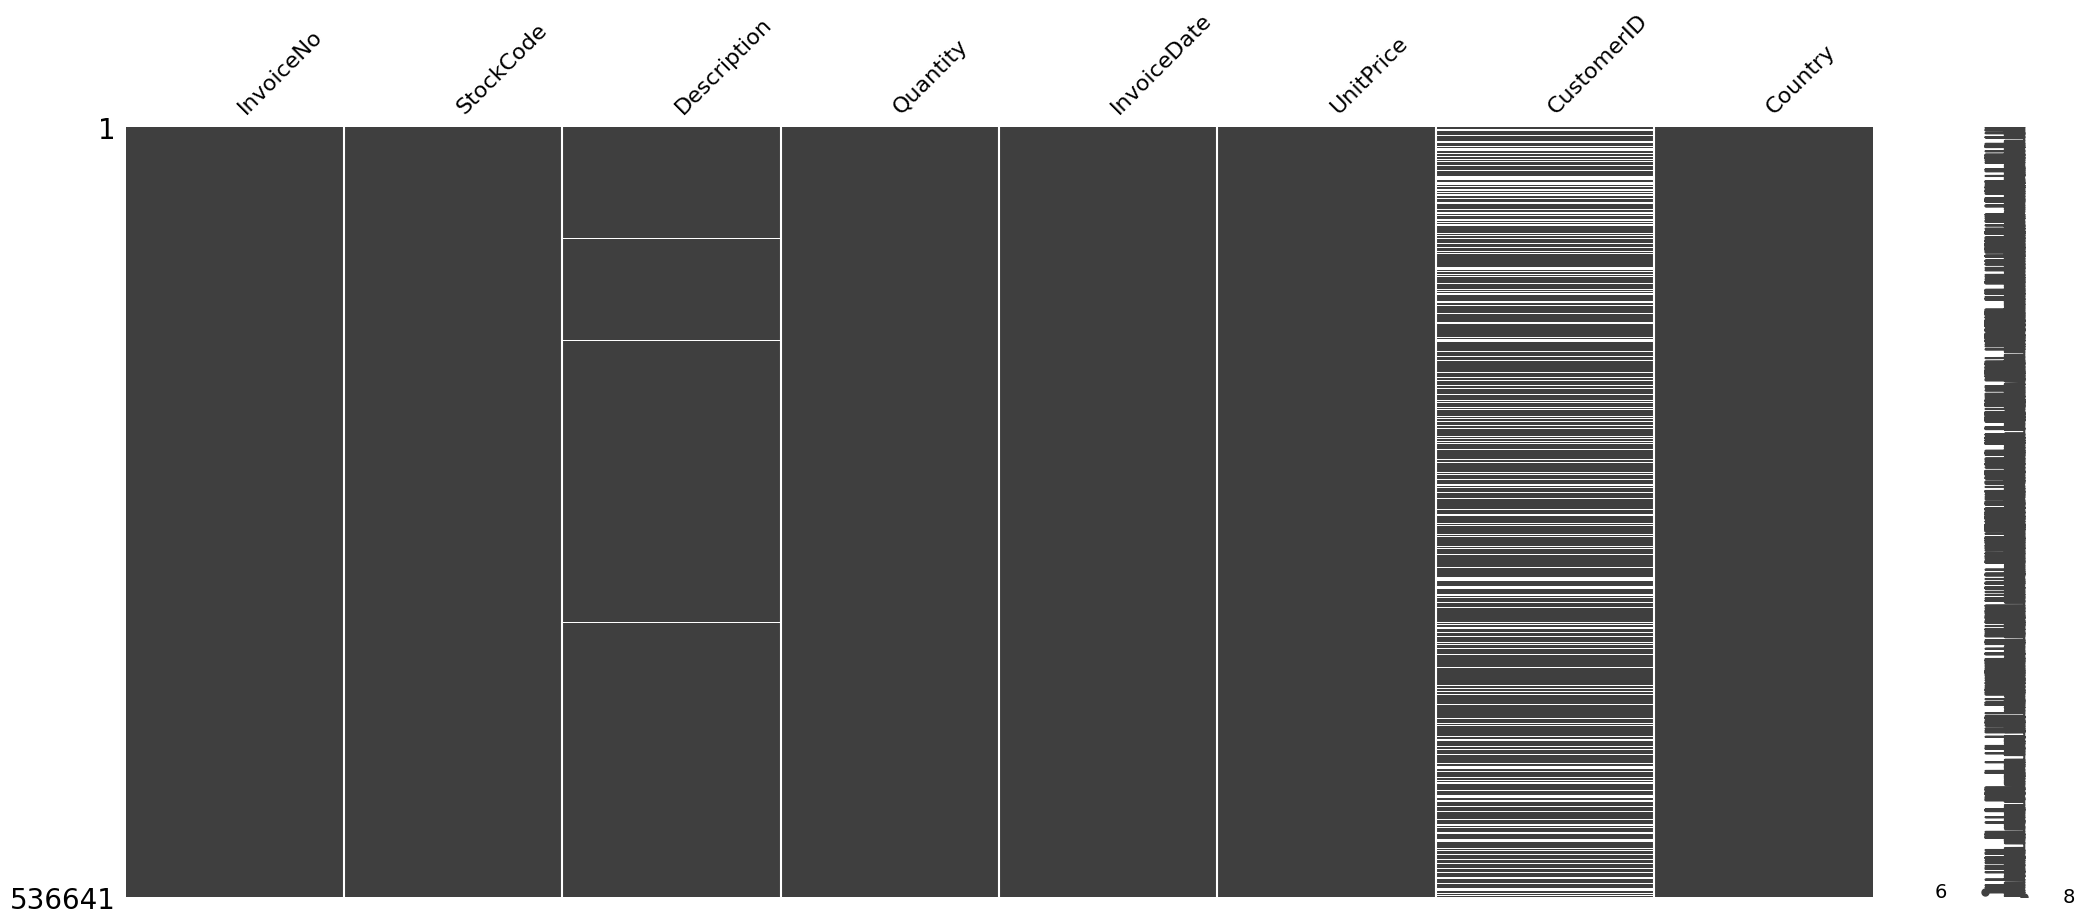

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
# Removeing cancelled order form dataset.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# droping NaN values 
df= df.dropna(axis = 0)

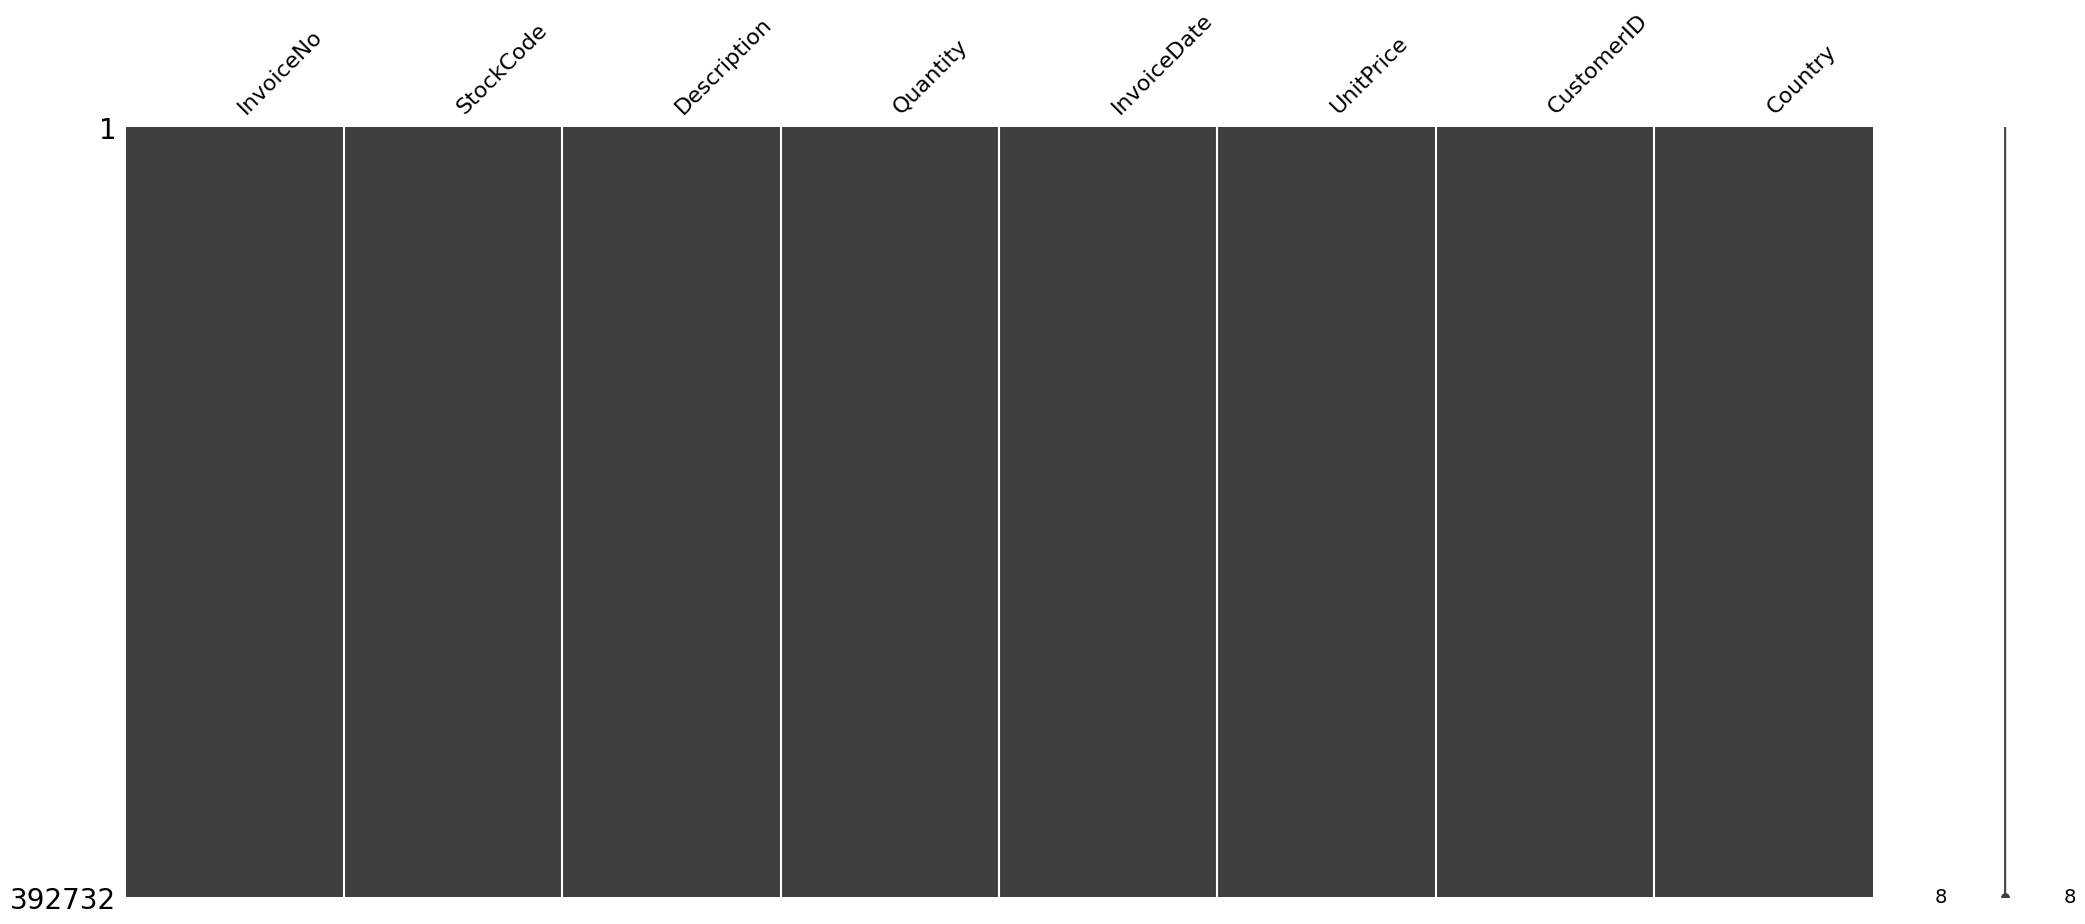

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392732,392732,392732,392732.000000,392732,392732.000000,392732.000000,392732
unique,18536,3665,3877,NaN,17286,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/11 15:27,NaN,NaN,United Kingdom
freq,542,2023,2016,NaN,542,NaN,NaN,349227
mean,NaN,NaN,NaN,13.153718,NaN,3.125596,15287.734822,NaN
std,NaN,NaN,NaN,181.588420,NaN,22.240725,1713.567773,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


### Variables Description 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n--------------------------------------------------------------")

Unique InvoiceNo's count:25900
--------------------------------------------------------------
Unique StockCode's count:4070
--------------------------------------------------------------
Unique Description's count:4223
--------------------------------------------------------------
Unique Quantity's count:722
--------------------------------------------------------------
Unique InvoiceDate's count:23260
--------------------------------------------------------------
Unique UnitPrice's count:1630
--------------------------------------------------------------
Unique CustomerID's count:4372
--------------------------------------------------------------
Unique Country's count:38
--------------------------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting string Object in datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%y %H:%M')

In [ ]:
# Create three new columns named year, month, day from datatime object
df['year']= df['InvoiceDate'].dt.year
df['month']= df['InvoiceDate'].dt.month
df['day']= df['InvoiceDate'].dt.weekday
df['hour'] = df['InvoiceDate'].dt.hour

In [ ]:
# Create a new feature named TotalAmount
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']

In [ ]:
# Creating a dataframe form analysing cancel orders
cancelled_orders_df = dataset[dataset['InvoiceNo'].str.contains('C')]

In [ ]:
# Converting string Object in datetime object in cancelled_orders_df for anaylsis
cancelled_orders_df['InvoiceDate'] = pd.to_datetime(cancelled_orders_df['InvoiceDate'],format='%m/%d/%y %H:%M')

# createting on feature named weekday and extracting day number.
cancelled_orders_df['day'] = cancelled_orders_df['InvoiceDate'].dt.weekday

In [ ]:
# getting the number of cancelled orders based on weekday 
cancelled_orders_by_day = cancelled_orders_df.day.value_counts().reset_index().rename(columns = {'index':'day','day':'cancelled_orders'})
cancelled_orders_by_day

,day,cancelled_orders
0,3,2355
1,1,1748
2,2,1729
3,0,1620
4,4,1371
5,6,465


In [ ]:
# Printing start and end date
print(df.InvoiceDate.min())
print(df.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
# Number of orders cancel from each country
cdf = cancelled_orders_df.Country.value_counts().reset_index().rename(columns = {'index':'country','Country':'cancelled_orders'})
cdf.head()

,country,cancelled_orders
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112


In [ ]:
# getting Number of orders cancels for each product
cancel_o = cancelled_orders_df['Description'].value_counts().reset_index().rename(columns = {'index':'Description','Description':'cancelled_orders'})
cancel_o.head()

,Description,cancelled_orders
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77


In [ ]:
# getting customers who cancel most number of orders 
most_c_orders = cancelled_orders_df.CustomerID.value_counts().reset_index().rename(columns = {'index':'CustomerID','CustomerID':'cancelled_orders'})
most_c_orders.head()

,CustomerID,cancelled_orders
0,14911.0,226
1,17841.0,136
2,17511.0,113
3,15311.0,112
4,12607.0,101


In [ ]:
# getting popular products based on number of orders 
item_p = df['Description'].value_counts().sort_values(ascending = False).reset_index()
item_p.rename(columns={'index':'Description','Description':'popularity'},inplace= True)
item_p.head()

,Description,popularity
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1390


In [ ]:
# getting popular products based on number of quantity
item_q = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending = False).reset_index()
item_q.head()

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3,JUMBO BAG RED RETROSPOT,46078
4,WHITE HANGING HEART T-LIGHT HOLDER,36706


In [ ]:
# getting customer who spend the Highest
t = df[['CustomerID','TotalAmount']]
top_c = t.groupby(['CustomerID'])['TotalAmount'].sum().reset_index().sort_values(by = 'TotalAmount',ascending = False)
top_c = top_c.reset_index()
top_c.drop('index',axis = 1,inplace = True)
top_c.head(10)

,CustomerID,TotalAmount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


In [ ]:
# getting top cuntry based on amount spend by customers and quantity orderd.
country_df = df.groupby(['Country']).agg({'TotalAmount':'sum','Quantity':'sum'}).reset_index().rename(columns = {'Country':'country_name'}).sort_values(by ='TotalAmount',ascending=False)
country_df.head()

,country_name,TotalAmount,Quantity
35,United Kingdom,7285024.644,4254037
23,Netherlands,285446.340,200937
10,EIRE,265262.460,140383
14,Germany,228678.400,119156
13,France,208934.310,111429


In [ ]:
# getting top country based on orders 
country_orders = df.Country.value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index':'country','Country':'orders'})
country_orders.head()

,country,orders
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


In [ ]:
# getting number of orders by years
year_df = df.year.value_counts().reset_index().rename(columns = {'index':'year','year':'orders_counts'})
year_df

,year,orders_counts
0,2011,367059
1,2010,25673


In [ ]:
# getting number of orders by month
month_df = df.month.value_counts().reset_index().rename(columns = {'index':'month','month':'total_orders'})
month_df

,month,total_orders
0,11,63182
1,10,48796
2,12,42699
3,9,39671
4,5,28075
5,6,26926
6,3,26872
7,8,26796
8,7,26582
9,4,22435


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,8,20.34


In [ ]:
# getting number of orders by weekday
day_df = df.day.value_counts().reset_index().rename(columns = {'index':'day','day':'total_orders'})
day_df

,day,total_orders
0,3,79260
1,2,68043
2,1,65747
3,0,64237
4,6,61214
5,4,54231


In [ ]:
# getting number of orders by hours
hour_df = df.hour.value_counts().reset_index().rename(columns = {'index':'hour','hour':'total_orders'})
hour_df

,hour,total_orders
0,12,70942
1,13,63024
2,14,53260
3,11,48373
4,15,44793
5,10,37775
6,16,23719
7,9,21928
8,17,12942
9,8,8688


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'TotalAmount'],
      dtype='object')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
def barplot(df):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
    plt.title(f"Total orders by {df.columns[0]}")
    plt.show()

In [ ]:
def B_plot(df):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
    plt.title(f"Distribution based on {df.columns[0]} and {df.columns[1]}")
    plt.xticks(rotation=90);
    plt.show()

#### Chart - 1

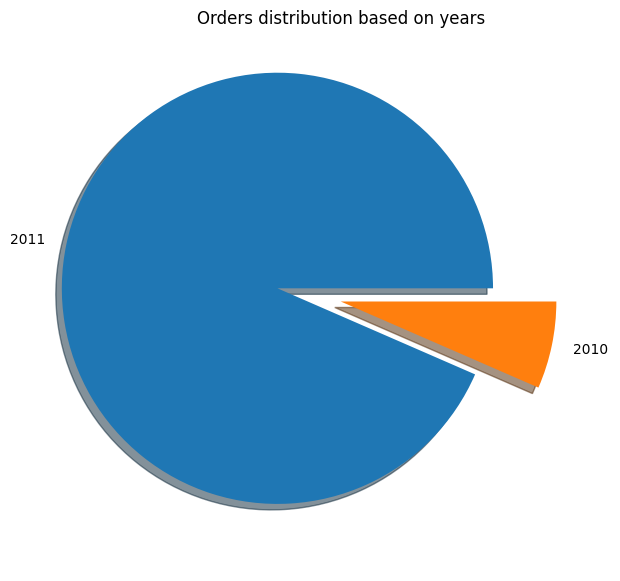

In [ ]:
# Chart - 1 visualization code
myexplode = [0.3, 0]
mylabels = ['2011', "2010"]
fig = plt.figure(figsize =(10, 7))
plt.pie(year_df['orders_counts'], labels = mylabels, explode = myexplode, shadow = True)
plt.title("Orders distribution based on years")
plt.show() 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

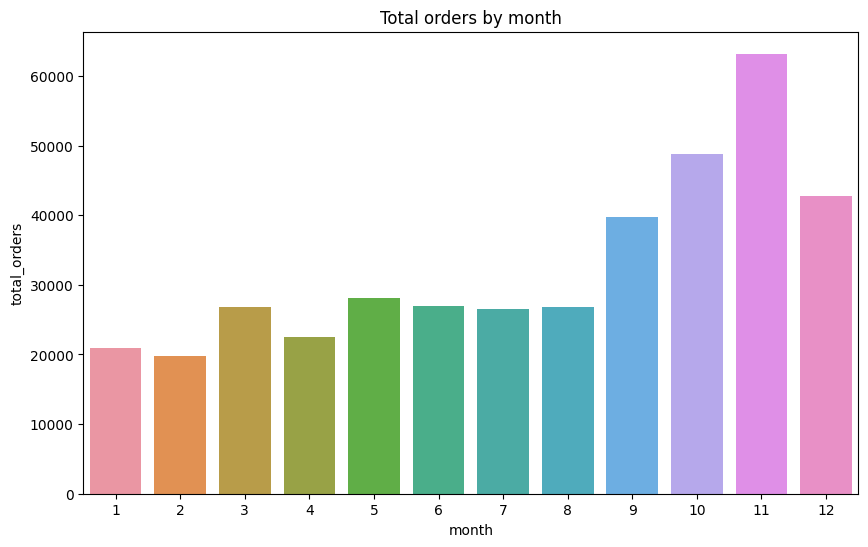

In [ ]:
# Chart - 2 visualization code
barplot(month_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

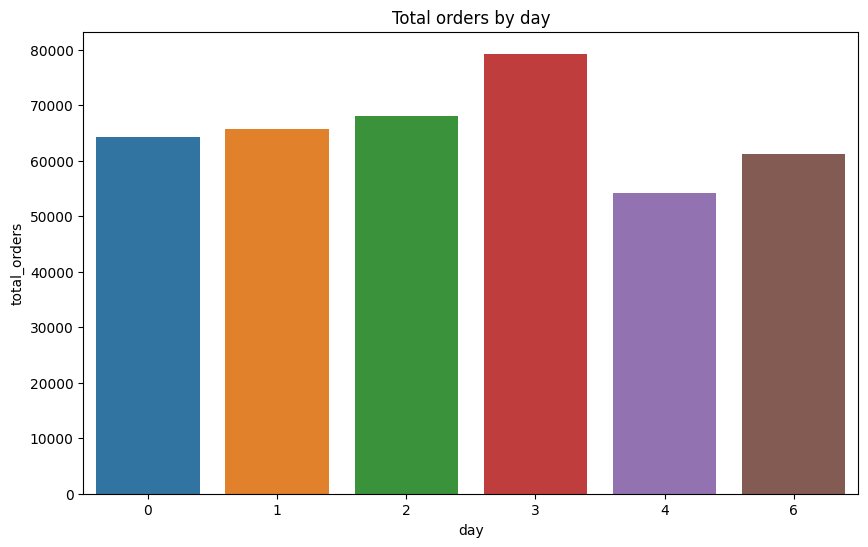

In [ ]:
# Chart - 3 visualization code
barplot(day_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

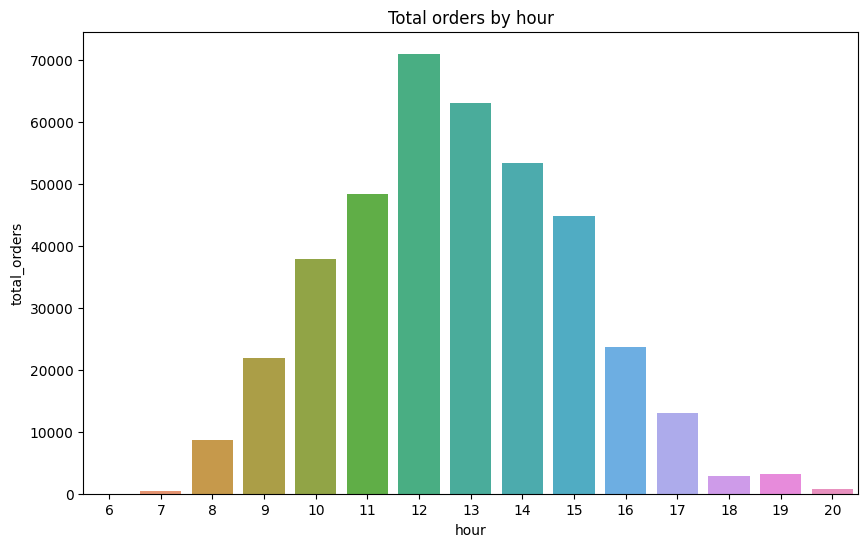

In [ ]:
# Chart - 4 visualization code
barplot(hour_df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

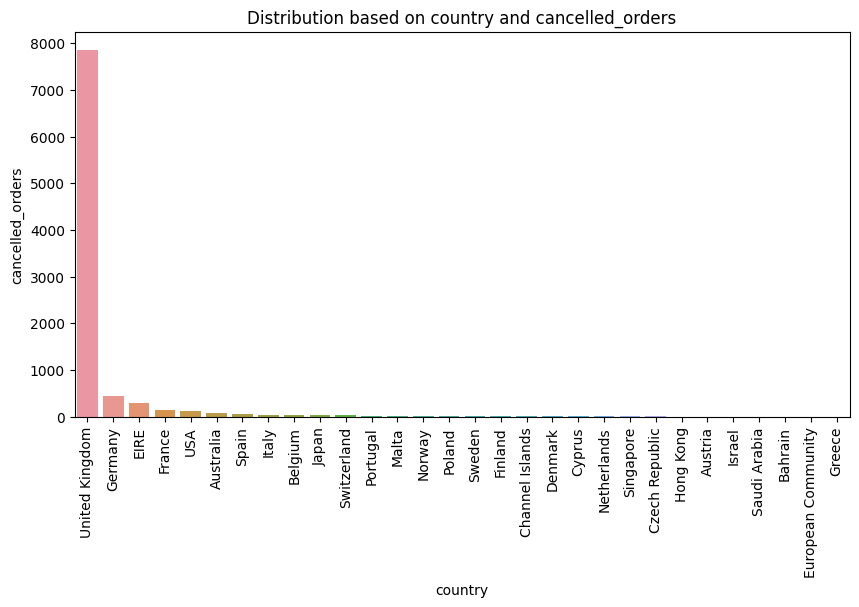

In [ ]:
# Chart - 5 visualization code
B_plot(cdf)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

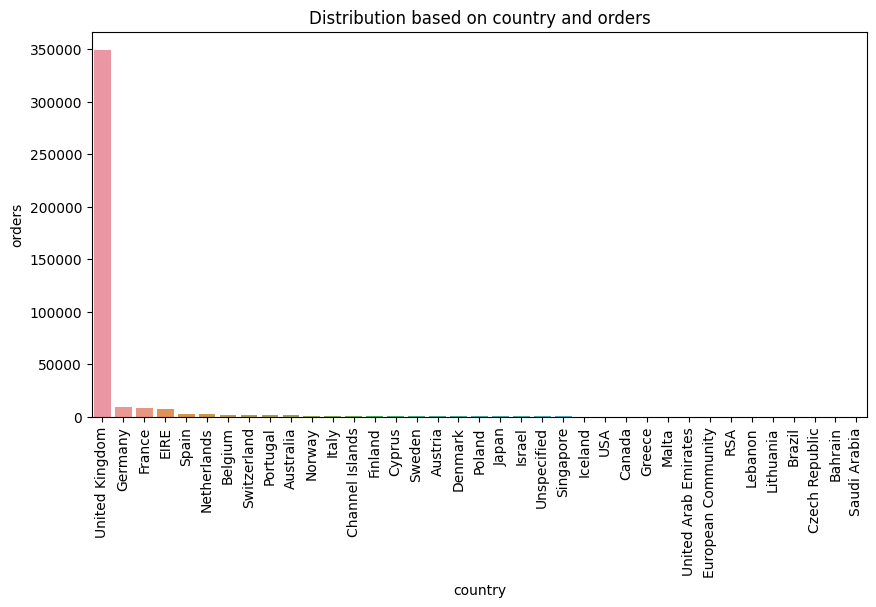

In [ ]:
# Chart - 6 visualization code
B_plot(country_orders)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

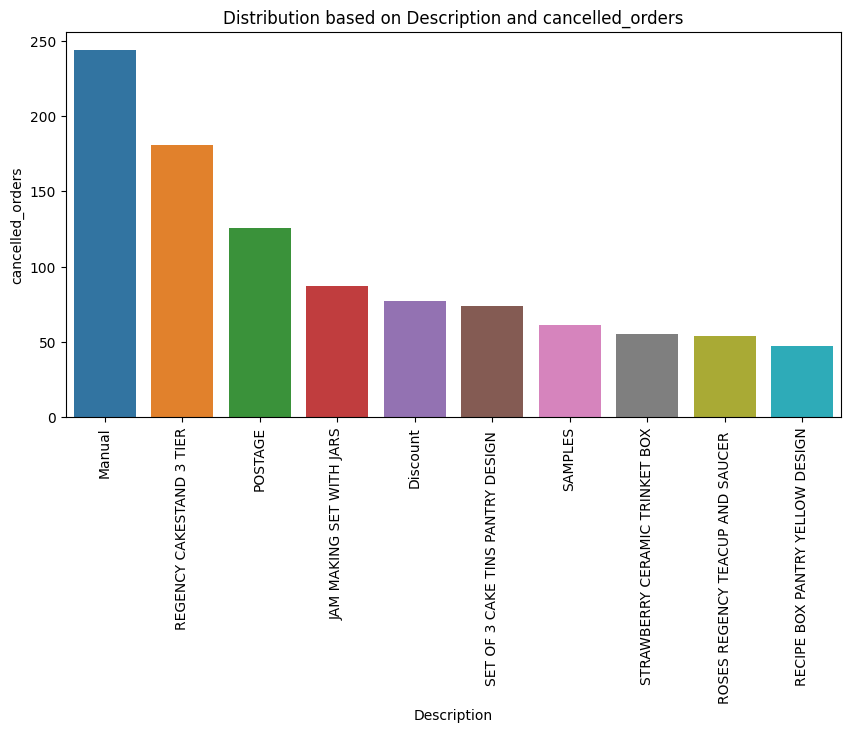

In [ ]:
# Chart - 7 visualization code
B_plot(cancel_o.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

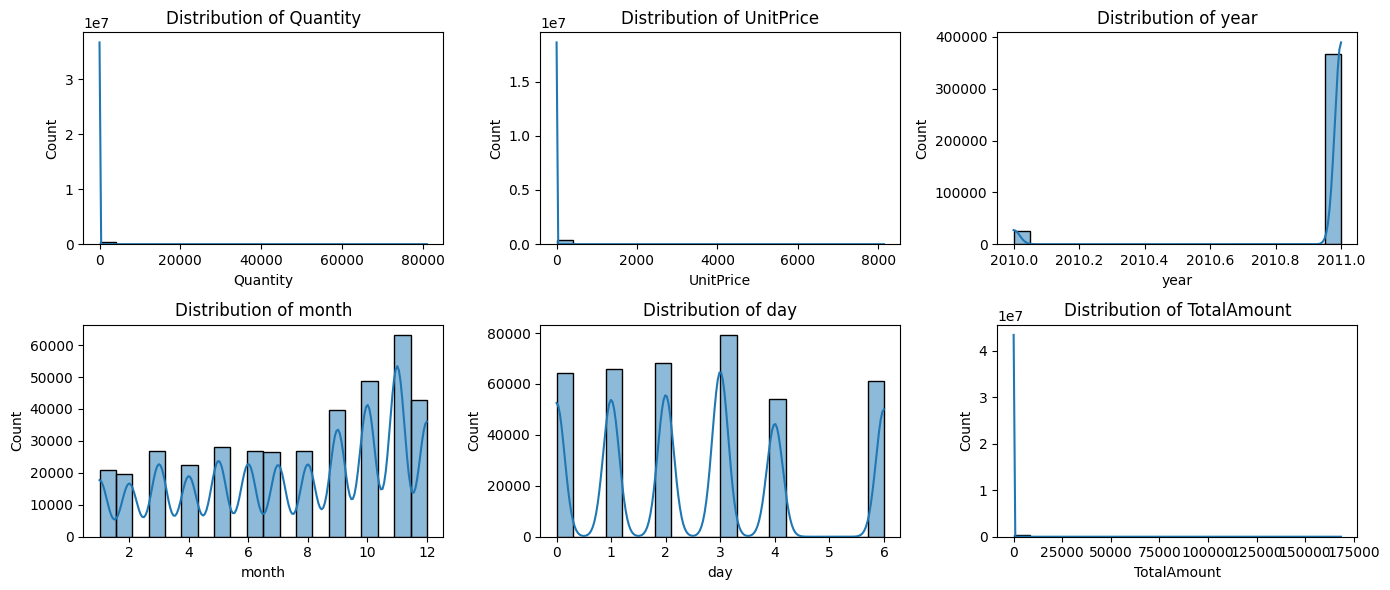

In [ ]:
# Chart - 8 visualization code
numerical_cols = ['Quantity', 'UnitPrice','year', 'month', 'day', 'TotalAmount']
rows=2
cols=3
counter=1
fig = plt.figure(figsize=(14, 6))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

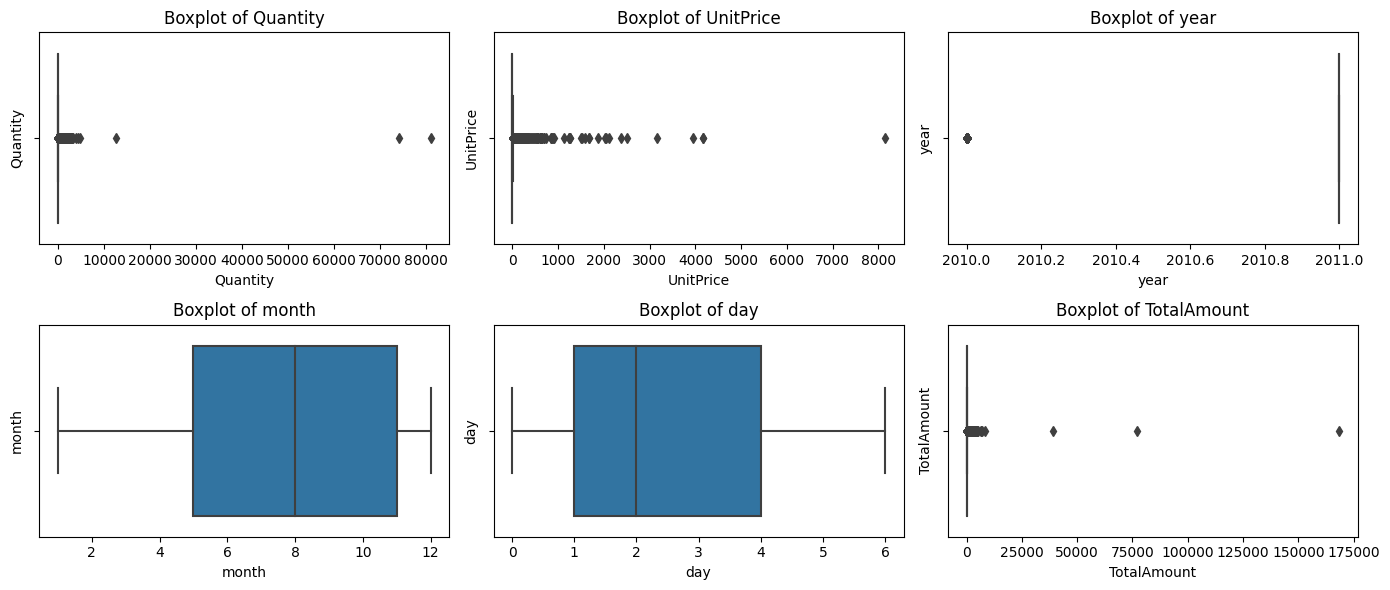

In [ ]:
# Chart - 9 visualization code
rows=2
cols=3
counter=1
fig = plt.figure(figsize=(14, 6))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

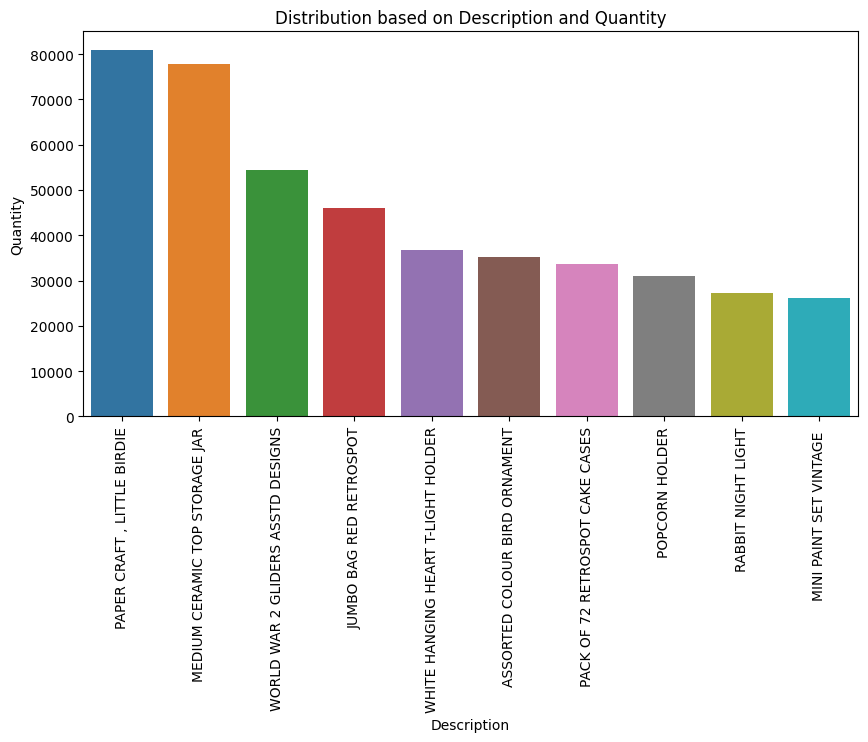

In [ ]:
# Chart - 10 visualization code
B_plot(item_q.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

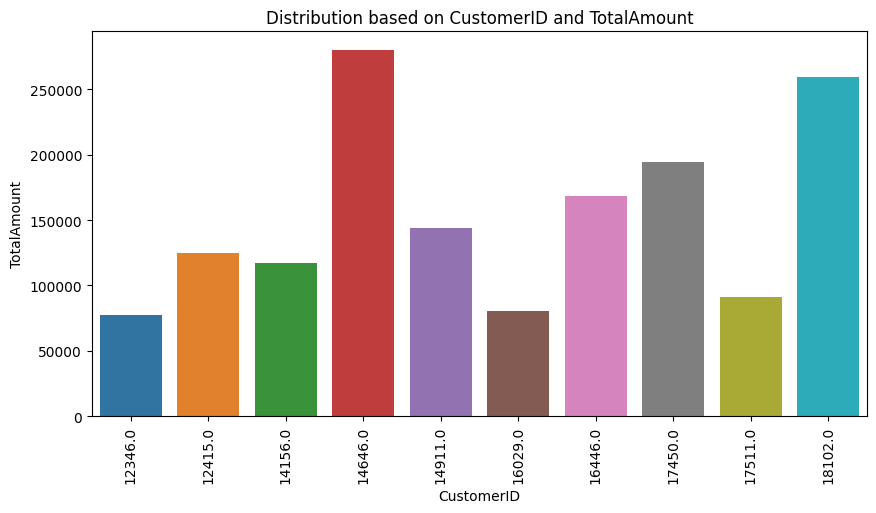

In [ ]:
# Chart - 11 visualization code
B_plot(top_c.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

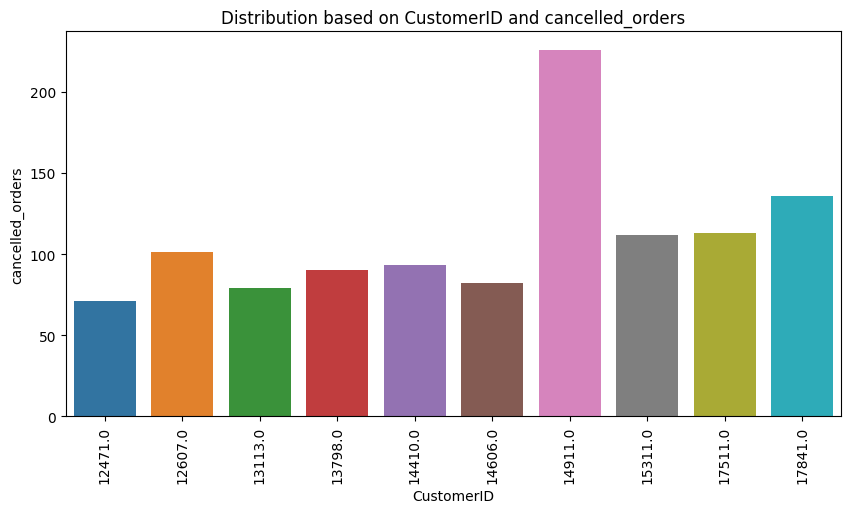

In [ ]:
# Chart - 12 visualization code
B_plot(most_c_orders.head(10))


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

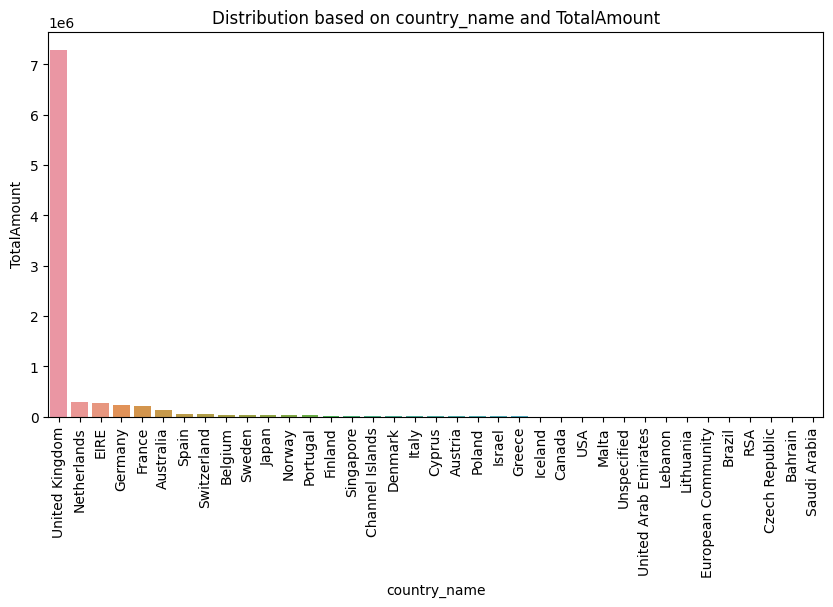

In [ ]:
# Chart - 13 visualization code
B_plot(country_df[['country_name','TotalAmount']])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

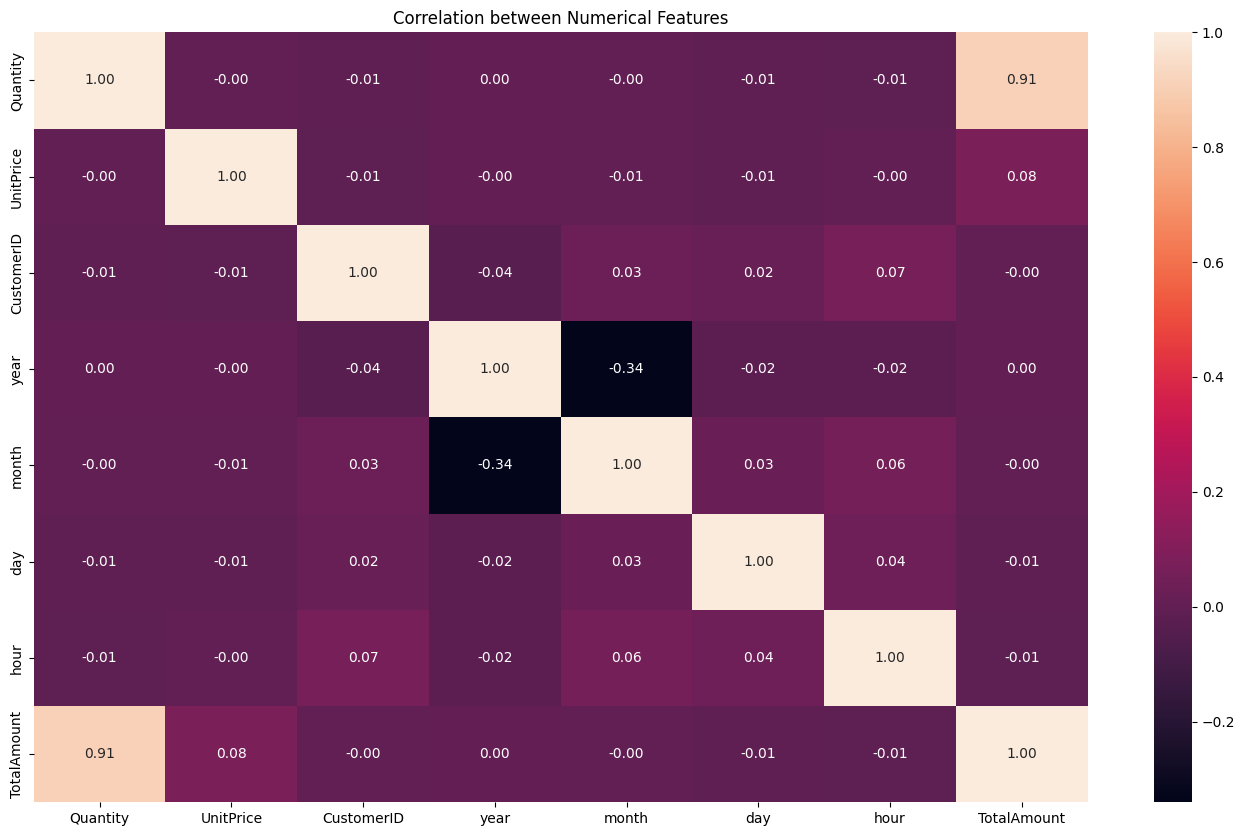

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# sns.pairplot(df)
# plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average Quantity purchased by customers who made purchases during different months of the year.

Alternative Hypothesis (H1): There is a significant difference in the average Quantity purchased by customers who made purchases during different months of the year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Group the data by month and calculate the average quantity purchased
month_groups = df.groupby('month')
month_avg_qty = month_groups['Quantity'].mean()

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Quantity'] for name, group in month_groups])

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test 

##### Why did you choose the specific statistical test?

One-way ANOVA is a statistical technique that is frequently employed to examine the distinction between three or more means, and it determines if the variation between groups is significantly greater than the variation within groups. 

In this scenario, we aim to assess if there is a substantial difference in the mean quantity purchased by customers who made purchases in different months of the year. ANOVA is a suitable test since we are comparing multiple months (groups).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average quantity purchased by customers from different countries.

Alternative Hypothesis (H1): There is a significant difference in the average quantity purchased by customers from different countries.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create a list of the unique countries in the dataset
countries = country_df['country_name']

# Create a list to store the data for each country
country_data = []

# Loop through the countries and extract the quantity data for each one
for country in countries:
    country_quantity_data = df[df['Country'] == country]['Quantity']
    country_data.append(country_quantity_data)

# Perform a one-way ANOVA test
f_stat, p_value = stats.f_oneway(*country_data)

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test 

##### Why did you choose the specific statistical test?

To compare the means of the average quantity purchased by customers from different countries, a one-way ANOVA test is utilized in this case. ANOVA is suitable for comparing means of more than two groups (in this case, multiple countries) and determining whether their means are significantly different from each other.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the proportion of cancelled orders between different days of the week.

Alternative Hypothesis (H1): There is a significant difference in the proportion of cancelled orders between different days of the week.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# creating a table haveing weekdays ,cancelled order and total non_cancelled order 
table = pd.merge(cancelled_orders_by_day, day_df, on='day')
table.columns = ['DayOfWeek', 'Cancelled', 'Total']

# perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency([table['Cancelled'], table['Total']-table['Cancelled']])

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

chi-square test

##### Why did you choose the specific statistical test?

The chi-square test is a statistical tool that helps determine whether there is a significant relationship between two categorical variables. In this specific case, we created a contingency table by grouping the cancelled and not-cancelled orders by the day of the week. By applying the chi-square test to this table, we can determine whether there is a significant association between the day of the week and the number of cancelled orders.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***